#Model

In [25]:
  import nltk
  nltk.download('punkt')
  nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# import tf.keras.preprocessing.text.Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NLP 7th sem/dataset/Sarcasm_Headlines_Dataset_v2.json', lines = True)

df.drop('article_link', axis=1, inplace=True)
df.columns = [ 'labels' ,  'text']

from sklearn.model_selection import train_test_split


# The input text, example could be list of sentences
texts = df['text'].values.tolist()

# The labels corresponding to the input text
labels = df['labels'].values.tolist()
df.head()


,labels,text
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(itext):
    itext = word_tokenize(itext.lower())
    stop_words = set(stopwords.words('english'))
    itext = [word for word in itext if word.isalpha() and not word in stop_words]
    return ' '.join(itext)

x = df.apply(lambda row: remove_stop_words(row['text']), axis=1)
y = df['labels']

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen=max_length)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
# from keras.layers.embeddings import Embedding

model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1280128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2280257 (8.70 MB)
Trainable params: 2280257 (8.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
hist = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=20)


Epoch 1/5
1145/1145 [==============================] - 17s 14ms/step - loss: 0.4979 - accuracy: 0.7475 - val_loss: 0.4117 - val_accuracy: 0.8096
Epoch 2/5
1145/1145 [==============================] - 16s 14ms/step - loss: 0.2535 - accuracy: 0.8972 - val_loss: 0.4629 - val_accuracy: 0.7975
Epoch 3/5
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0923 - accuracy: 0.9690 - val_loss: 0.6294 - val_accuracy: 0.7825
Epoch 4/5
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0330 - accuracy: 0.9889 - val_loss: 0.8626 - val_accuracy: 0.7759
Epoch 5/5
1145/1145 [==============================] - 16s 14ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 1.0649 - val_accuracy: 0.7734


[]

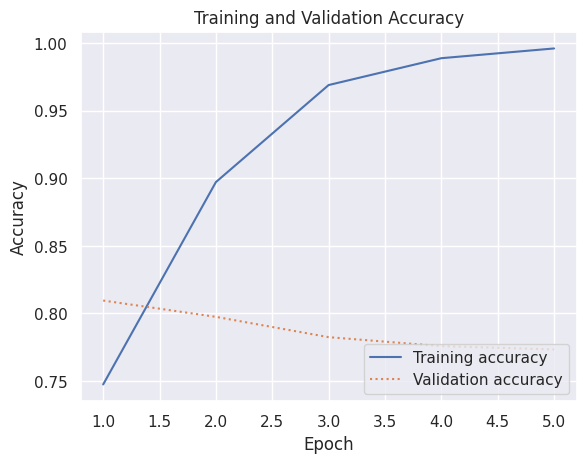

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [32]:
cleaned_text = remove_stop_words('dem rep. totally nails why congress is falling short on gender, racial equality' )
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)[0][0]

1/1 [==============================] - 0s 39ms/step


9.4740106e-05